# 1 {-}

**In this problem we will revisit the cheating casino model of Problem 1 in homework 8. Let $Y(0),Y(1),...,Y(200)$ be the die rolls you generated in 1(a) of homework 8. (In the lecture I used $Z(t)$ as the hidden state, but here to match hw 8 I’ll use $X(t)$ as before.**

# a {-}

**Derive the forward algorithms for computing,** 

$$\alpha_t^{HW} =P(X(t)|Y(0),...,Y(t))$$

**Write an R/Python function Forward($Y$) that accepts a vector $Y$ giving the values $Y(0),Y(1),...,Y(200)$ and returns $\alpha_t$ for all values of $t$.**

Note $0$ denotes fair, $1$ denotes cheating. Also, I let $\alpha_t$ be the one defined in the lecture video and $\alpha_t^{HW}$ the one defined above. I'll derive $\alpha_t^{HW}$ based on the $\alpha_t$ in the lecture video.

Each 
$$\alpha_t=
\begin{pmatrix}
P(Y(0), \ldots, Y(t), X(t)=0) \\
P(Y(0), \ldots, Y(t), X(t)=1)
\end{pmatrix}
$$

We will be returning a matrix of size $2 \times 201$, since $X(t) \in \{0,1\}$ and $T=200.$
In other words, we will be returning:

$$\begin{pmatrix}
\alpha_0(0) & \alpha_1(0) & \ldots & \alpha_{200}(0) \\
\alpha_0(1) & \alpha_1(1) & \ldots & \alpha_{200}(1)
\end{pmatrix}$$

Now, we start with the initial distribution $\pi(i)$, which is $1$ if $i=0$ and $0$ otherwise according to prompt, since we start Fair. We let $P$ be the transition probability matrix and $g_{i_t}(j_t)=P(Y(t)=j_t|X(t)=i_t)$.


In an iterative fashion, we start with $\alpha_0:$

$$\alpha_0(i)$$
$$=P(Y(0), X(0)=i)$$
$$=P(Y(0)|X(0)=i)P(X(0)=i)$$
$$=g_i(Y(0))\pi(i)$$

Then given $\alpha_t$, we do $\alpha_{t+1}:$

$$\alpha_{t+1}(i)$$
$$=P(Y(0), \ldots, Y(t), Y(t+1), X(t+1)=j)$$
$$=\sum_{i=0}^{1}P(Y(0), \ldots, Y(t), Y(t+1), X(t+1)=j, X(t)=i)$$
$$=\sum_{i=0}^{1}P(Y(t+1), X(t+1)=j|Y(0), \ldots, Y(t), X(t)=i)$$
$$P(Y(0), \ldots, Y(t), X(t)=i)$$
$$=\sum_{i=0}^{1}P(Y(t+1), X(t+1)=j|X(t)=i)\alpha_t(i)$$
$$=\sum_{i=0}^{1}\alpha_t(i)\frac{P(Y(t+1), X(t+1)=j,X(t)=i)}{P(X(t)=i)}$$
$$=\sum_{i=0}^{1}\alpha_t(i)P(Y(t+1)| X(t+1)=j,X(t)=i)P(X(t+1)=j|X(t)=i)$$
$$=\sum_{i=0}^{1}\alpha_t(i)P(Y(t+1)|X(t+1)=j)P(X(t+1)=j|X(t)=i)$$




$$=\sum_{i=0}^{1}\alpha_t(i)g_j(Y(t+1))P_{ij}$$

Now note that 

$$\alpha_t^{HW}$$

$$=P(X(t)|Y(0),...,Y(t))$$

$$=\frac{P(X(t),Y(0),...,Y(t))}{P(Y(0),...,Y(t))}$$

$$=\frac{\alpha_t}{P(Y(0),...,Y(t))}=\frac{\alpha_t}{D}$$

Since 

$$\sum_{i=0}^{1}\alpha_t^{HW}(i)=\sum_{i=0}^{1}P(X(t)=i|Y(0),...,Y(t))=1$$

$$\implies \sum_{i=0}^{1}\frac{P(X(t)=i,Y(0),...,Y(t))}{D}=1$$

$$\implies D=\sum_{i=0}^{1}P(X(t)=i,Y(0),...,Y(t))$$

So,

$$P(X(t)=j|Y(0),...,Y(t))=\frac{P(X(t)=j,Y(0),...,Y(t))}{\sum_{i=0}^{1}P(X(t)=i,Y(0),...,Y(t))}$$ 

for $j=0,1.$ And we are done.


In [1]:
def Forward(Y):
    """Calculates the forward probabilities"""
    alphas = np.zeros([2, 201])
    alphas[0,0] = 1
    alphas[1,0] = 0
    for t in range(1, 201):
        alphas[0, t] = alphas[0, t-1]*dist_Y[0, Y[t]-1]*P[0,0] + alphas[1, t-1]*dist_Y[0, Y[t]-1]*P[1,0]
        alphas[1, t] = alphas[0, t-1]*dist_Y[1, Y[t]-1]*P[0,1] + alphas[1, t-1]*dist_Y[1, Y[t]-1]*P[1,1]
        D = alphas[0, t]+alphas[1, t]
        alphas[0, t] = alphas[0, t] / D
        alphas[1, t] = alphas[1, t] / D
    return alphas

# b {-}

**Derive the backward algorithm for computing,**

$$\beta_t=P(Y(t+1),Y(t+2),...,Y(200)|X(t))$$

**Write an R/Python function that computes $\beta_t$ over all $t$ given the die roll data.**

Each 
$$\beta_t=
\begin{pmatrix}
P(Y(t), \ldots, Y(200)| X(t-1)=0) \\
P(Y(t), \ldots, Y(200), X(t-1)=1)
\end{pmatrix}
$$

We will be returning a matrix of size $2 \times 201$, since $X(t) \in \{0,1\}$.
In other words, we will be returning:

$$\begin{pmatrix}
\beta_0(0) & \beta_1(0) & \ldots & \beta_{200}(0) \\
\beta_0(1) & \beta_1(1) & \ldots & \beta_{200}(1)
\end{pmatrix}$$

We let $\beta_{200}(i)=1$ for $i=0,1$.

From there, in an iterative fashion, we start with $\beta_{T-1}:$

$$\beta_{T-1}(i)$$
$$=P(Y(T)|X(T-1)=i)$$
$$=\sum_{j=0}^{1}P(Y(T), X(T)=j|X(T-1)=i)$$
$$=\sum_{j=0}^{1}P(Y(T)|X(T)=j, X(T-1)=i)P(X(T)=j|X(T-1)=i)$$
$$=\sum_{j=0}^{1}P(Y(T)|X(T)=j)P(X(T)=j|X(T-1)=i)$$

By letting $P$ be the transition probability matrix and $g_{i_t}(j_t)=P(Y(t)=j_t|X(t)=i_t)$ we get the following form:

$$=\sum_{j=0}^{1}g_j(y(T))P_{ij}$$

Then, assuming $\beta_t$ we do $\beta_{t-1}$:

$$\beta_{t-1}(j)$$
$$P(Y(t),Y(t+1),...,Y(200)|X(t-1)=j)$$
$$=\sum_{i=0}^{1}P(Y(t),Y(t+1),...,Y(200), X(t)=i|X(t-1)=j)$$
$$=\sum_{i=0}^{1}P(Y(t+1),Y(t+2),...,Y(200)|X(t)=i, Y(t), X(t-1)=j)$$
$$P(Y(t)|X(t)=i, X(t-1)=j)P(X(t)=i|X(t-1)=j)$$
$$=\sum_{i=0}^{1}P(Y(t+1),Y(t+2),...,Y(200)|X(t)=i)$$
$$P(Y(t)|X(t)=i)P(X(t)=i|X(t-1)=j)$$
$$=\sum_{i=0}^{1}\beta_t(i)g_i(Y(t))P_{ji}$$

In [2]:
def Backward(Y, T=200):
    """Calculates the backward probabilities"""
    betas = np.ones([2, 201])
    betas[0,T-1] = dist_Y[0, Y[T-1]-1]*P[0, 0]+dist_Y[0, Y[T-1]-1]*P[0,1]
    betas[1,T-1] = dist_Y[1, Y[T-1]-1]*P[1, 0]+dist_Y[1, Y[T-1]-1]*P[1,1]
    for t in np.flip(range(0, T-1)):
        betas[0, t] = betas[0, t+1]*dist_Y[0, Y[t+1]-1]*P[0,0] + betas[1, t+1]*dist_Y[1, Y[t+1]-1]*P[0,1]
        betas[1, t] = betas[0, t+1]*dist_Y[0, Y[t+1]-1]*P[1,0] + betas[1, t+1]*dist_Y[1, Y[t+1]-1]*P[1,1]
    return betas

# c {-}

**Write an R/Python function that computes the smoothing probability,**

$$P(X(t) = C | Y(0), Y(1), . . . , Y(200))$$

**Plot the smoothing probability as a function of t and compare to your estimate in hw 8.**


In [3]:
import numpy as np
first = np.repeat(1/6,6)
second = np.concatenate((np.repeat((49/50)/5, 5), np.array([1/50])))

dist_Y = np.concatenate((first, second), axis=0).reshape(2,6)
dist_Y

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.196     , 0.196     , 0.196     , 0.196     , 0.196     ,
        0.02      ]])

In [4]:
P = np.array([[0.95,0.05],[0.05,0.95]])
P

array([[0.95, 0.05],
       [0.05, 0.95]])

In [5]:
def SampleCasino(T):
    """
    Args:
        T: scalar
    Returns:
        x, y: matrices of size (T,)
    """
    x_start = 0
    x = [x_start]
    y_start = np.random.choice(range(1,7), p=dist_Y[x[0]])
    y = [y_start]

    for i in range(1, T+1):
        xi = np.random.choice([0, 1], p=P[x[i-1]])
        x.append(xi)
        yi = np.random.choice(range(1,7), p=dist_Y[x[i-1]])
        y.append(yi)   
    
    return x, y

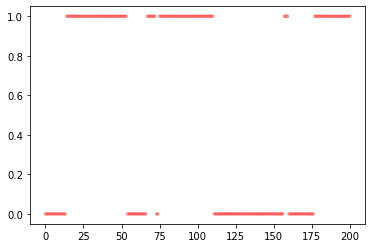

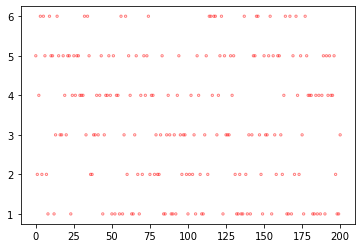

In [11]:
import matplotlib.pyplot as plt
X, Y = SampleCasino(200)
plt.scatter(range(0, len(X)), X, facecolors='none', edgecolors='red', alpha=0.5, s=5)
plt.show()

plt.scatter(range(0, len(Y)), Y, facecolors='none', edgecolors='red', alpha=0.5, s=5)
plt.show()

In [12]:
betas = Backward(Y)
alphas = Forward(Y)

In [13]:
def get_smoothing_probs(betas, alphas):
    """Calculates the smoothing probabilities"""
    return np.multiply(alphas, betas) / np.multiply(alphas, betas).sum(axis=0)

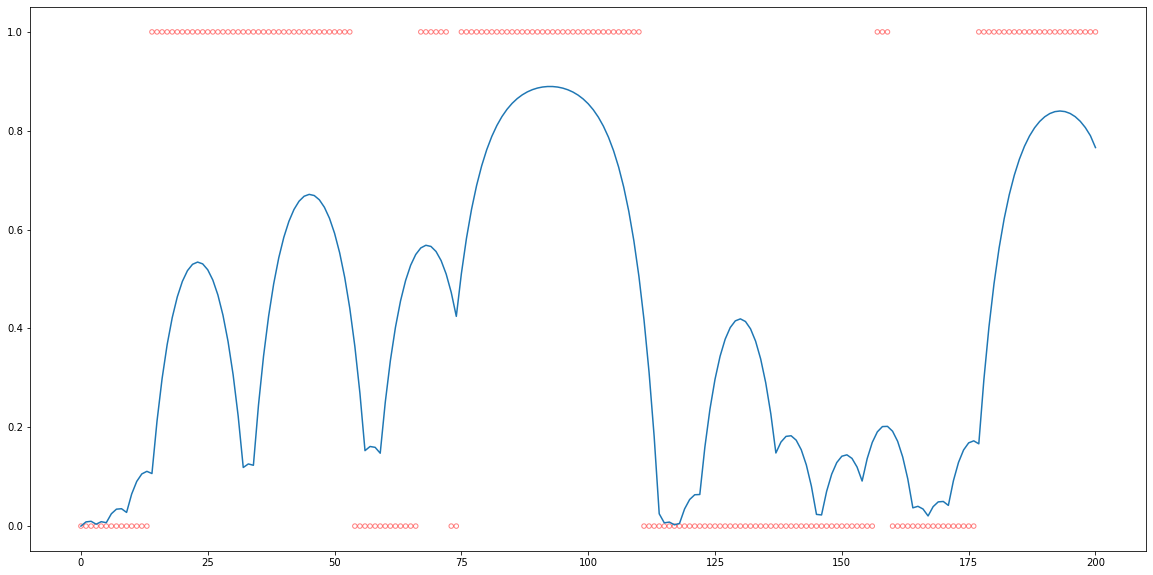

In [14]:
smoothing_probs = get_smoothing_probs(betas, alphas)
plt.figure(figsize=(20,10))
plt.plot(smoothing_probs[1,:])
plt.scatter(range(0, len(X)), X, facecolors='none', edgecolors='red', alpha=0.5, s=20)
plt.show()

The results are similar to what is obtained in the previous HW via MCMC, maybe one could argue this method is "surer" -- when the casino is not cheating, the probability that it is cheating given the data is closer to $0$ than with MCMC. However, in terms of speed, this approach is much better -- MCMC is very slow.

# 3 {-}

**Attached you will find two papers describing the SNE and t-SNE dimensional reduction algorithms. The SNE algorithm was introduced in 2002 and the t-SNE algorithm was introduced as an improvement on SNE in 2008. Here we will implement the SNE paper, just for the sake of simplicity given the limited time. Both algorithms attempt to find a low-dimensional non-linear space that describes the data, as opposed to PCA which attempts to find a linear subspace. Your goal below will be to apply the SNE algorithm with steepest descent. Watch the first 25 minutes of this video on t-SNE, which essentially applies to SNE as well.**

 https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AV
  oG88PLl8nGXmw


# a {-}

**In the SNE paper, equation (4) gives the loss function the authors are trying to optimize. They call it a cost function. Explain the authors’ motivations in using this cost function. What are the variables in the cost function? In other words, what are we optimizing?**

SNE converts high-dimensional euclidean distances between data points into probabilites that represent similarities. Given a set of datapoints $x_1, x_2, ...x_N \in R^n$, $p_{j|i}$ is the probability that $x_i$ would pick $x_j$ as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centred at $x_i$ and with variance $\sigma_i$. We want $\sigma_i$ to be small for points in densely populated areas and large for sparse areas -- we  quantify this by specifying a hyperparameter called the perplexity. The perplexity is basically the effective number of neighbors for any point and typical values ranges between 5 and 50 dependent on the data set size. Similarly, we define $q_{i|j}$ as the condtional probability corresponding to low-dimensional representations of $y_i \in R^m, n>m$ and $y_j \in R^m, n>m$ (corresponding to $x_i$ and $x_j$). The variance of Gaussian in this case is set to be $1/\sqrt 2$.

The conditional probability $p_{j|i}$ that a data point $x_i$ would pick $x_j$ as its neighbor, per the paper, is given by

$$p_{j|i}=\frac{e^{-||x_i-x_j||^2/2\sigma_i^2}}{\sum_{j \ne i}e^{-||x_i-x_j||^2/2\sigma_i^2}}$$

with $p_{i|i}=0.$

And similarly, 

$$q_{j|i}=\frac{e^{-||y_i-y_j||^2}}{\sum_{j \ne i}e^{-||y_i-y_j||^2}}$$

with $q_{i|i}=0.$


SNE tries to find a low-dimensional mapping, which minimizes the mismatch between the conditional probabilites $p_{j|i}, q_{j|i}$ and this mismatch can be measured by the Kullback-Leibler divergence (also called relative entropy) $KL(P_i||Q_i)=P_i\log \frac{P_i}{Q_i}$. And so, the cost function is the sum of all KL divergences between $p_{j|i}, p_{j|i}$ distributions over neighbors for each object $i$.

$$\text{Cost function}=C=\sum_i \sum_j p_{j|i}\log \frac{p_{j|i}}{p_{j|i}}=\sum_i KL(P_i||Q_i)$$

This makes sense as a function to minimize (cost function). Note that two similar high dimensional points will have a high $p_{i|j}$ or $p_{j|i}$. So ideally you want the two points to have high $q_{i|j}, q_{j|i}$ values -- If not, the cost function will suffer a high penalty by definition of $KL(P_i||Q_i)=P_i\log \frac{P_i}{Q_i}$ (log value will explode, go to infinity).

Thanks to this cost function, SNE focuses on retaining the local structure of the data in the mapping from a high dimensional space to a lower one.

Note, the variables in the cost function are the low-dimensional representations of $y_i$ and $y_j$ (corresponding to $x_i$ and $x_j$). I.e, we want:

$$\min_{y_i \in R^m} C = \min_{y_i \in R^m}\sum_i KL(P_i||Q_i)$$

Also note: t-SNE build off of this. Among the differences:

1. Instead of using the conditional probabilities $p_{j|i}$ and $q_{j|i}$ the joint probability distributions $P$ and $Q$ are used to optimize a symmetric version of SNE with the cost function

$$\text{Cost function}=C=\sum_i \sum_j p_{ij}\log \frac{p_{ij}}{p_{ij}}=KL(P||Q)$$.

2. The pairwise similarities in the high-dimensional space are defined by the conditional probabilities, $p_{ij}=\frac{p_{j|i}+p_{i|j}}{2n}$

3. The low dimensional similarities are given by using the t-distribution with 1 degree of freedom (fatter tails than a gaussian) to avoid the crowding problem (due to the curse of high dimensionality)

# b {-}

**Derive equation (5) which gives a formula for the gradient of the cost function. As a start, you may want to assume that we are reducing to a single dimension, making each $y$ a scalar, but then make sure to generalize to any dimension.**

Attached.

# c {-}


**Write R functions to compute the cost function and the gradient of the cost functions given data points $x$ and the dimensional reduced points $y$.**

Let's define some helper functions.

In [15]:
def neg_squared_euc_dists(X):
    """Compute matrix containing negative squared euclidean
    distance for all pairs of points in input matrix X

    Args:
        X: matrix of size (500, 10)
    Returns:
        -D: matrix of size (500, 500) with entry D_ij = negative squared
        euclidean distance between rows X_i and X_j
    """
    
    d = scipy.spatial.distance.pdist(X)
    D = scipy.spatial.distance.squareform(d)**2
    return -D

In [16]:
def softmax(X):
    """Take softmax of each row of matrix X"""
    ex = np.exp(X)
    # we do not want the diagonal to influence the sum
    np.fill_diagonal(ex, 0.)
    # add for numerical stability
    ex = ex + 1e-9
    return ex / ex.sum(axis=1).reshape(-1,1)

In [17]:
def calc_prob_matrix(distances, sigmas=None):
    """Convert a distances matrix to a matrix of probabilities"""
    if sigmas is not None:
        two_sig_sq = 2. * sigmas
        return softmax(distances / two_sig_sq)
    else:
        return softmax(distances)

In [18]:
def p_conditional(X):
    """Given a data matrix X, gives conditional probabilities matrix
    Args:
        X: matrix of size (500, 10)
    Returns:
        P: Matrix with entries p_ij = conditional probabilities
    """
    # Get the negative euclidean distances matrix for our data
    distances = neg_squared_euc_dists(X)
    # Calculate the probabilities 
    p_conditional = calc_prob_matrix(distances, sigmas)
    return p_conditional

In [19]:
def q_conditional(Y):
    """Given a data matrix Y, gives conditional probabilities matrix
    Args:
        X: matrix of size (500, 10)
    Returns:
        Q: Matrix with entries q_ij = conditional probabilities
    """
    # Get the negative euclidean distances matrix for our data
    distances = neg_squared_euc_dists(Y)
    # Calculate the probabilities
    q_conditional = calc_prob_matrix(distances, None)
    return q_conditional

In [20]:
def kullback_leibler(Q, P, i):
    """ Computes kullback leibler divergence given two probability masses"""
    q = np.delete(Q[i], i)
    p = np.delete(P[i], i)
    
    return (p*np.log(p/q)).sum()

Now let's define the cost and gradient functions.

In [21]:
def cost_fnc(Q, P):
    """ Computes the value of the cost function used in SNE"""
    cost = 0
    for i in range(0, N):
        cost += kullback_leibler(Q, P, i)
    return cost

In [22]:
def gradient_fnc(lower_dim, Y, Q):
    """Computes the value of the gradient of the cost function used in SNE"""
    y_diffs = Y - Y.reshape(-1, 1, lower_dim)
    pq_diffs = (P - Q + P.T - Q.T).T
    grad = (y_diffs*pq_diffs.reshape(-1, 500, 1)).sum(axis=0)
    return grad

# d {-}

**Using steepest descent, compute SNE to dimensionally reduce the dataset of hw 8, problem 2 to $R^1$ and $R^2$. Plot the 1-d and 2-d reductions produced by SNE and compare to your results in hw 8.**

An iteration of steepest descent is:

$$\begin{pmatrix}
y_1^{(i+1)} \\
y_2^{(i+1)} \\
\vdots \\
y_N^{(i+1)}
\end{pmatrix} = 
\begin{pmatrix}
y_1^{(i)} \\
y_2^{(i)} \\
\vdots \\
y_N^{(i)}
\end{pmatrix} - s\begin{pmatrix}
2\sum_{j}(y_0^{(i)}-y_j^{(i)})(P_{0|j}-Q_{0|j}+P_{j|0}-Q_{j|0}) \\
2\sum_{j}(y_1^{(i)}-y_j^{(i)})(P_{1|j}-Q_{1|j}+P_{j|1}-Q_{j|1}) \\
\vdots \\
2\sum_{j}(y_N^{(i)}-y_j^{(i)})(P_{N|j}-Q_{N|j}+P_{j|N}-Q_{j|N}) \\
\end{pmatrix}
$$

where $s$ is the learning rate and $y_j$ represents a row vector of dimension $m$.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
import scipy

data = pd.read_csv("~/MATH611/HW8/diffusion_maps_data.csv")
print(data.shape)

N = data.shape[0]
data.head()

(500, 11)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,beta
0,-0.478914,-0.049141,-0.297305,0.087278,-0.229072,0.515732,-0.095343,-0.125465,-0.244472,0.235513,0.000000
1,-0.469228,-0.058886,-0.295487,0.039958,-0.259343,0.439233,-0.128250,-0.124088,-0.233148,0.205576,0.002004
2,-0.773425,-0.142003,-0.504606,-0.124775,-0.573540,0.447500,-0.357173,-0.209389,-0.357601,0.233504,0.004008
3,-0.723794,-0.105599,-0.461564,-0.000996,-0.448032,0.586690,-0.245723,-0.193004,-0.350866,0.282495,0.006012
4,-0.495562,-0.081031,-0.319431,-0.037716,-0.335130,0.347980,-0.196559,-0.133088,-0.235042,0.172952,0.008016


Let's do some preprocessing. We need to find the $\sigma_i^2$, which will be the variance between each $x_i$ and $k$ nearest neighbors.

In [24]:
from sklearn.neighbors import NearestNeighbors

def get_sigmas(k):
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(data)

    distances = knn.kneighbors(data, k, return_distance=True)[0]
    variance = (distances**2).sum(axis=1)/(k-1)
    return variance

In [25]:
sigmas = get_sigmas(40).reshape(500,1)
sigmas.shape

(500, 1)

In [26]:
# getting our data matrix
X = data.drop("beta", axis=1).to_numpy()
# getting P matrix
P = p_conditional(X)

In [27]:
def steepest_descent(lower_dim, max_iters = 10**6, learning_rate = 2., epsilon=10**-6):
    """ steepest descent algorithm used in SNE to get the lower dimensional embeddings"""
    # initialize the low-dimensional embeddings 
    # in random locations close to origin
    Y = np.random.rand(500, lower_dim)
    Q = q_conditional(Y)
    grad = gradient_fnc(lower_dim, Y, Q)
    i = 0
    
    while (np.linalg.norm(grad) > epsilon) and (i <= max_iters):
        Y = Y - learning_rate*grad
        # minmax scaling Y for numerical stability
        scaler = MinMaxScaler()
        Y = scaler.fit_transform(Y)
        Q = q_conditional(Y)
        grad = gradient_fnc(lower_dim, Y, Q)
        # plotting
        if i % 100 == 0:
            if lower_dim == 1:
                plt.scatter(Y, np.zeros(500), c=data["beta"], cmap=cm.rainbow)
            else:
                plt.scatter(Y[:,0], Y[:,1], c=data["beta"], cmap=cm.rainbow)
            plt.show()
        i += 1
        
    return Y

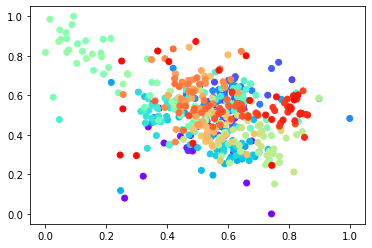

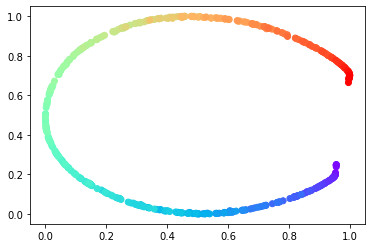

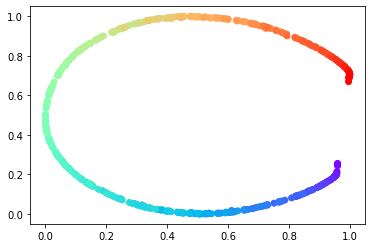

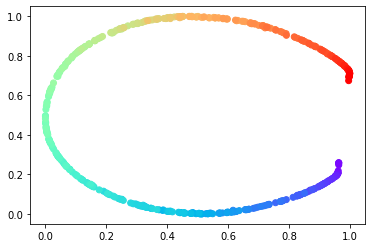

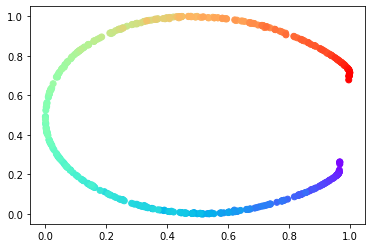

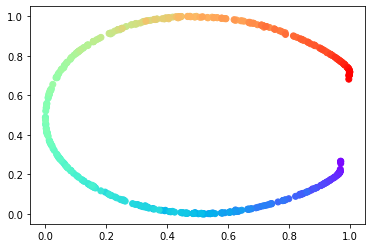

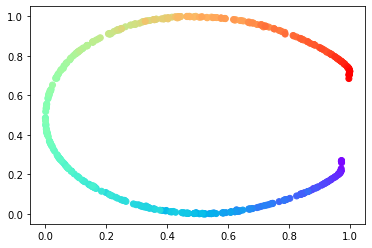

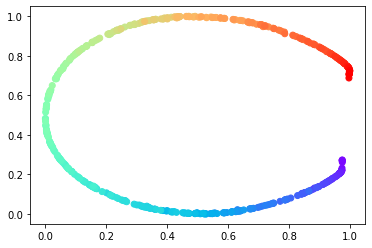

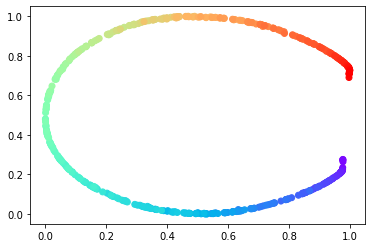

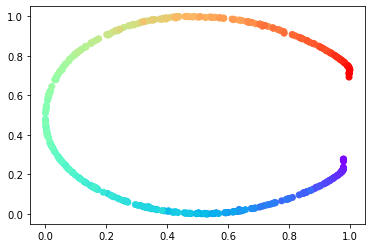

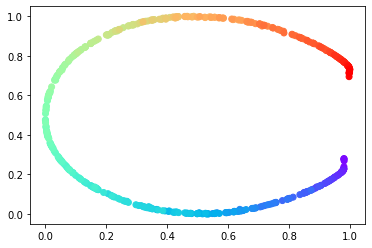

In [34]:
# two dimensional embeddings
Y1 = steepest_descent(2)

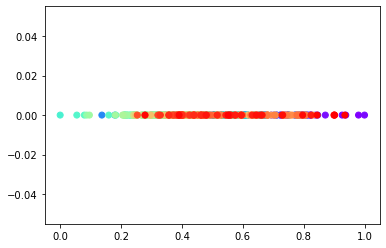

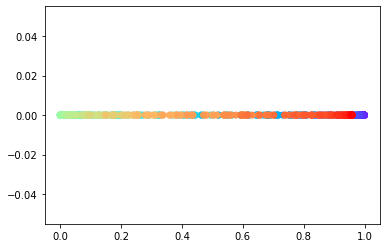

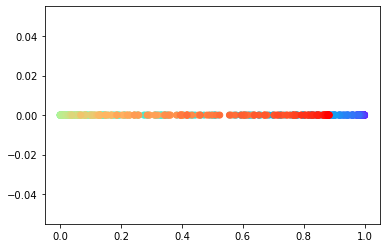

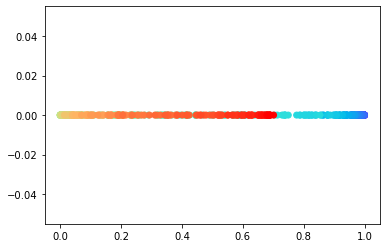

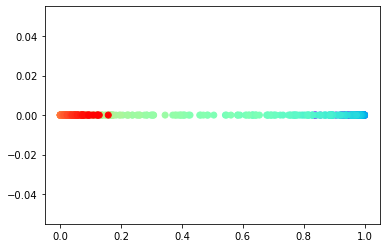

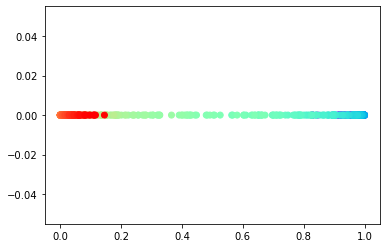

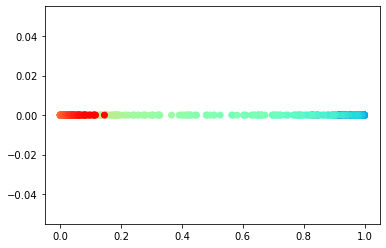

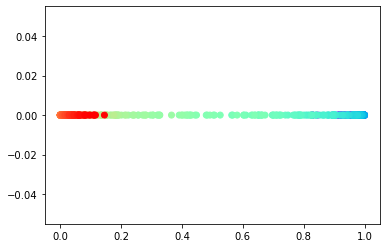

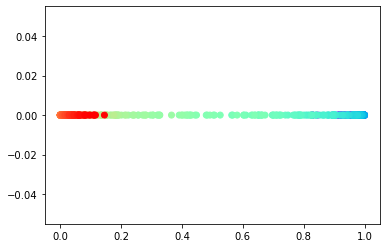

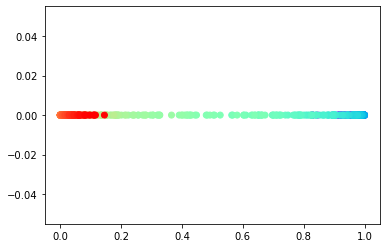

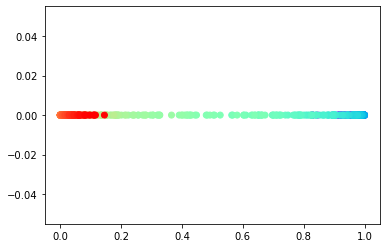

In [35]:
# one dimensional embeddings
Y2 = steepest_descent(1)

Above were some plots at given iterations, let's plot the final low dimensional embeddings.

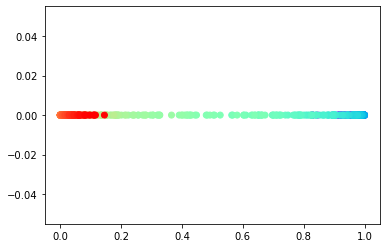

In [37]:
# one dimensional embeddings
plt.scatter(Y2, np.zeros(500), c=data["beta"], cmap=cm.rainbow)
plt.show()

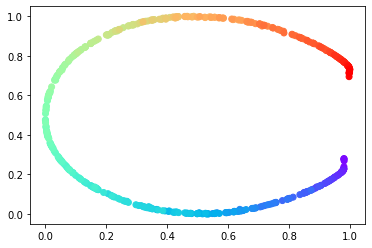

In [38]:
# 2 dimensional embeddings
plt.scatter(Y1[:,0], Y1[:,1], c=data["beta"], cmap=cm.rainbow)
plt.show()

Compared to the results in the previous HW, we can see that the underlying manifold is observed much better in the case of 2-d -- it looks very much like a horseshoe (almost identical to how the horseshoe was created, see below)! It is reasonable to say that SNE finds the 2-d plane in $R^{10}$ that the horseshoe lies in. In the case of the 1-d plot, we can see that SNE is able to capture $\beta$, small values on one side and large values on the other (this was similarly captured in the results of the previous HW). 

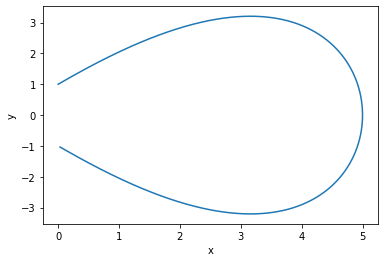

In [39]:
# ignoring seed because R vs. python
import numpy as np
import matplotlib.pyplot as plt
n = 500
beta = np.arange(0,1,1/500)
x = 5*np.sin(np.pi*beta)
y = 2*(.5-beta) + 20*beta*(1-beta)*np.cos(np.pi*beta)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()